<a href="https://colab.research.google.com/github/BhanuSrihridai/British-Airways/blob/Development/British_airways.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import nltk


In [2]:
base_url="https://www.airlinequality.com/airline-reviews/british-airways"
pages=10
page_size=100

reviews=[]

for i in range(1,pages+1):

    print(f"Scraping page {i}")

    # Creating url from a page to collect data
    # url = https://www.airlinequality.com/airline-reviews/british-airways/page/2/?sortby=post_date%3ADesc&pagesize=100

    url=f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())

    print(f"   ---> {len(reviews)} total reviews")




Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [3]:
df = pd.DataFrame()
df["reviews"] = reviews
df.sample(10)

,reviews
659,✅ Trip Verified | Sofia to London. A good ove...
537,✅ Trip Verified | I want to say a big thank y...
969,✅ Trip Verified | Flown with British Airways o...
64,"✅ Trip Verified | Filthy plane, cabin staff o..."
562,✅ Trip Verified | My flight from Los Angeles ...
489,Not Verified | Poorly mismanaged services thi...
543,✅ Trip Verified | Ok flight apart from they c...
439,✅ Trip Verified | British Airways has scrappe...
605,✅ Trip Verified | I flew from Sydney to Londo...
216,✅ Trip Verified | Although it was a bit uncom...


In [4]:
df.to_csv("C:\Data Science\Internship\British Airways\British Airways.csv")


In [5]:
df=pd.read_csv("British Airways.csv")

# **Data Cleaning**

**Checking for null values**

In [6]:
df.isnull().sum()

Unnamed: 0    0
reviews       0
dtype: int64

**Removing the punctuation**

In [7]:
df['review_processed'] = df['reviews'].str.replace("[^a-zA-Z0-9]", " ")


<ipython-input-7-91d5aada4604>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['review_processed'] = df['reviews'].str.replace("[^a-zA-Z0-9]", " ")


In [8]:
df["review_processed"]

0        Trip Verified    Booked online months ago an...
1        Trip Verified    The flight was on time  The...
2      Not Verified    Angry  disappointed  and unsat...
3        Trip Verified    As an infrequent flyer  Bri...
4      Not Verified    A totally unremarkable flight ...
                             ...                        
995      Trip Verified    San Francisco to London  Te...
996      Trip Verified    Heathrow to Vancouver  The ...
997      Trip Verified    London to Bucharest  First ...
998      Trip Verified    I forgot I had purchased a ...
999      Trip Verified    When the passenger in front...
Name: review_processed, Length: 1000, dtype: object

**Creating a column for trip verifcation**

In [9]:
# def trip_verification(row):

#   words = row.split()
#   for word in words :
#     first_two_words=' '.join(words[:2])
#     return first_two_words

In [10]:
# df['Trip Verification'] = df['review_processed'].apply(lambda row: trip_verification(row))
# df.head()

Or simply we can use join method as below

In [11]:
df['Trip Verification'] = df['review_processed'].apply(lambda row: ' '.join(row.split()[:2]) )
df['review_processed'] = df['review_processed'].apply(lambda row: ' '.join(row.split()[2:]) )    # Removing verification tag from the review
df.head()

,Unnamed: 0,reviews,review_processed,Trip Verification
0,0,✅ Trip Verified | Booked online months ago an...,Booked online months ago and the only hitch wa...,Trip Verified
1,1,✅ Trip Verified | The flight was on time. The...,The flight was on time The crew were polite It...,Trip Verified
2,2,"Not Verified | Angry, disappointed, and unsat...",Angry disappointed and unsatisfied My route wa...,Not Verified
3,3,"✅ Trip Verified | As an infrequent flyer, Bri...",As an infrequent flyer British Airways was alw...,Trip Verified
4,4,"Not Verified | A totally unremarkable flight,...",A totally unremarkable flight on time as comfo...,Not Verified


In [12]:
cols=['Unnamed: 0','reviews']
df=df.drop(columns=cols)
df.head()

,review_processed,Trip Verification
0,Booked online months ago and the only hitch wa...,Trip Verified
1,The flight was on time The crew were polite It...,Trip Verified
2,Angry disappointed and unsatisfied My route wa...,Not Verified
3,As an infrequent flyer British Airways was alw...,Trip Verified
4,A totally unremarkable flight on time as comfo...,Not Verified


**Replacing the shorter words with space**

In [13]:
df['review_processed']=df['review_processed'].apply(lambda row: ' '.join([word for word in row.split() if len(word.strip())>2]))
df['review_processed']


0      Booked online months ago and the only hitch wa...
1      The flight was time The crew were polite was t...
2      Angry disappointed and unsatisfied route was f...
3      infrequent flyer British Airways was always fi...
4      totally unremarkable flight time comfortable E...
                             ...                        
995    San Francisco London Terrible service and food...
996    Heathrow Vancouver The seats booked not given ...
997    London Bucharest First class ground staff but ...
998    forgot had purchased hand baggage only fare th...
999    When the passenger front reclines his her seat...
Name: review_processed, Length: 1000, dtype: object

In [14]:
df['review_processed'][168]


'LHR check was quick the First Wing and quickly through security The First lounge was quiet for change and reasonably good breakfast buffet available While have brought back their Highlife magazine the lounge seems they used Covid scrap all the other magazines they used offer part the endless cost cutting The toilets the lounge were disgusting ever not cleaned frequently this visit and they are about years out date the public washrooms are better and cleaner Boarding was the usual muddled mess and two the gate staff appeared have clue what they were doing Endless announcements the gate about being full flight requesting passengers check bags only get flight that was less than full Onboard very good welcome from Captain and the flight left the gate only mins late Breakfast had choices and was fair standard hot towels even packet towels offered Club Europe any more another part the relentless cost cutting wouldn mind but fares are proportionately lot higher now than pre Covid Cabin staff

**Converting all words into lower case**

In [15]:
df['review_processed']=[row.lower() for row in df['review_processed']]
df['review_processed']

0      booked online months ago and the only hitch wa...
1      the flight was time the crew were polite was t...
2      angry disappointed and unsatisfied route was f...
3      infrequent flyer british airways was always fi...
4      totally unremarkable flight time comfortable e...
                             ...                        
995    san francisco london terrible service and food...
996    heathrow vancouver the seats booked not given ...
997    london bucharest first class ground staff but ...
998    forgot had purchased hand baggage only fare th...
999    when the passenger front reclines his her seat...
Name: review_processed, Length: 1000, dtype: object

**Removing the stop words**

In [16]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk import word_tokenize

stop_words = stopwords.words('english') # extracting all the stop words in english language and storing it in a variable called stop_words -> set
stop_words

add_words = ['british', 'airway','airways', 'flight', 'get', 'airline', 'fly'] # Adding our custom stop words
stop_words.extend(add_words)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [17]:
def remove_stopwords(rev):
    # input : IT WILL TAKE ROW/REVIEW AS AN INPUT
    # take the paragraph, break into words, check if the word is a stop word, remove if stop word, combine the words into a para again
    review_tokenized = word_tokenize(rev)
    rev_new = " ".join([i for i in review_tokenized  if i not in stop_words])
    return rev_new

In [18]:
review_tokenized = word_tokenize(df['review_processed'][350])

rev_new = " ".join([i for i in review_tokenized  if i not in stop_words])

rev_new

'cancelled never got book another refunded quarter spent despite covid guarantees booked onto april 29th 2022 hong kong london cancelled looked rebooking later date covid ticketing flexibility assurances find including october opted refund thinking full refund refunded paid called service centre explanation fathom could cancel flights available full refund phone call takes minutes talk customer service thats frustration begins customer service people adamant full refund given asked wait escalate case month later phone calls later thats hours waiting phone finally refunded little total less paid would seem refund increments would call customer service take round circles got frustrated give instead calling enquired via website answer getting full refund cancel booking neither fault decided stop another month waiting reason gave email thanks contacting claim compensation sorry necessary cancel heathrow april 2022 claim refused ba0032 cancelled non payable commercial reason request would a

In [19]:
df['review_processed']=[remove_stopwords(r) for r in df['review_processed']]

In [20]:
df['review_processed'].head()

0    booked online months ago hitch replacement air...
1    time crew polite story outward find europe gen...
2    angry disappointed unsatisfied route london at...
3    infrequent flyer always first choice reassuran...
4    totally unremarkable time comfortable european...
Name: review_processed, dtype: object

**Lemmatisation**

In [21]:
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [22]:
lemmatiser = WordNetLemmatizer()

def nltk_tag_to_wordnet_tag(nltk_tag):
  if nltk_tag.startswith('J'):
    return wordnet.ADJ

  elif nltk_tag.startswith('V'):
    return wordnet.VERB

  elif nltk_tag.startswith('N'):
      return wordnet.NOUN

  elif nltk_tag.startswith('R'):
      return wordnet.ADV
  else:
      return None


In [23]:
def lemmatize_sentence(sentence):

  nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))

  wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)

  lemmatized_sentence = []

  for word, tag in wordnet_tagged:
        if tag is None:
            #if there is no available tag, append the token as is
            lemmatized_sentence.append(word)
        else:
            #else use the tag to lemmatize the token
            lemmatized_sentence.append(lemmatiser.lemmatize(word, tag))

  return " ".join(lemmatized_sentence)

df['review_processed'] = df['review_processed'].apply(lambda x: lemmatize_sentence(x))


In [24]:
df['review_processed'][0]

'book online month ago hitch replacement aircraft mean choose seat different inform prior departure could amend bag drop man smooth suspect man fault shuttle board slow delay meaning rush lhr cpt full leave less time cabin clean expect sufficient leg arm room plus little perks drink complaint seat actually recline far staff good first hour service especially george food quite tasty one option load breakfast also quite tasty land time ointment case arrive late carousel later notice break likely cpt pleasant surprise'

**Plotting frequent words**


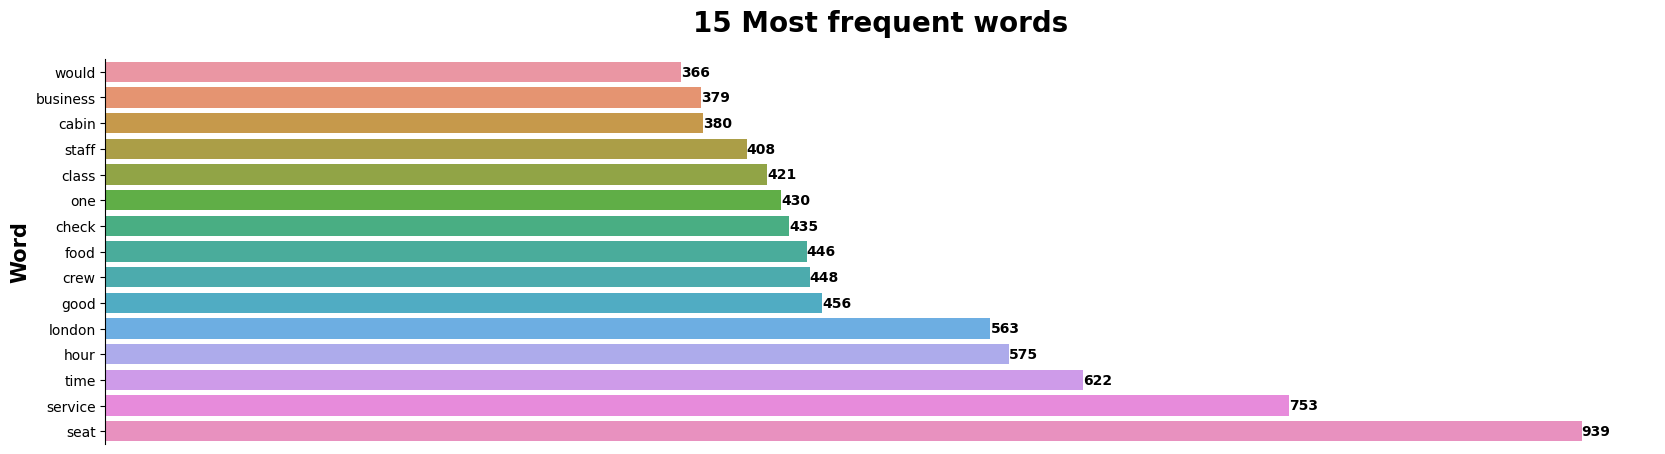

In [68]:
import seaborn as sns
from nltk import FreqDist
import matplotlib.pyplot as plt

#Extracts words into list and count frequency
all_words = ' '.join([text for text in df['review_processed']])
all_words = all_words.split()
words_df = FreqDist(all_words)

# Extracting words and frequency from words_df object
words_df = pd.DataFrame({'word':list(words_df.keys()), 'count':list(words_df.values())})
words_df

# Subsets top 30 words by frequency
words_df = words_df.nlargest(columns="count", n = 15)

words_df.sort_values('count', inplace = True)

# Plotting 30 frequent words
plt.figure(figsize=(20,5))
# ax = plt.barh(words_df['word'], width = words_df['count'])
# plt.show()

axes=sns.barplot(y=words_df['word'],x=words_df['count'])
plt.title('15 Most frequent words',fontweight='bold',fontsize=20,pad=20)
plt.ylabel('Word',fontweight='bold',fontsize=15)
axes.bar_label(axes.containers[0],color='black',padding=0,fontweight='bold')                    # Setting the barlables, so that the count can be seen on the bars
axes.spines[['right','top','bottom']].set_visible(False)                                          # Removing the chart junk like boarders
axes.xaxis.set_visible(False)                                                                     # Sets visibility of x-axis to False so that x-axis doesn't visible


**Word Cloud**

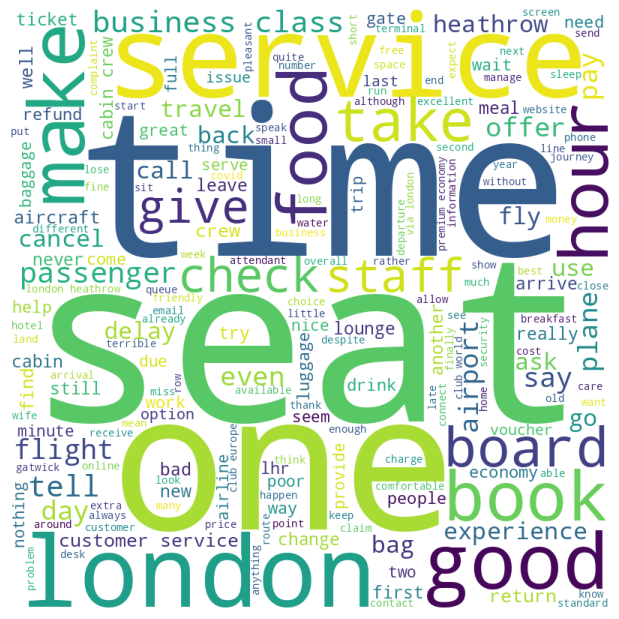

In [26]:
from wordcloud import WordCloud
all_words = ' '.join([text for text in df['review_processed']])

wordcloud = WordCloud(width = 800, height = 800,
                      background_color ='white',
                      min_font_size = 10).generate(all_words)

#plot the WordCloud image
plt.figure(figsize = (6,6), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

# **Sentiment Analysis with VADER**

VADER stands for "Valence Aware Dictionary and sEntiment Reasoner." It is a pre-built, rule-based sentiment analysis tool designed for the English language. VADER is specifically tuned to analyze and interpret sentiments in text data, especially in the context of social media.

Developed by researchers at the Georgia Institute of Technology, VADER is designed to handle the challenges of sentiment analysis in text, such as handling sentiment-laden words, slang, negations, and context. VADER assigns a polarity score to a given text, indicating whether the sentiment is positive, negative, or neutral. The tool also provides an overall compound score that combines these individual scores.

In [27]:
! pip install vaderSentiment

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.7 MB/s eta 0:00:00


In [28]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyser = SentimentIntensityAnalyzer()

# Method to find the sentiment score
def sentiment_Score(review):
  scores=analyser.polarity_scores(review)
  return scores['compound']

# Method to find the sentiment
def sentiment_Analysis(score):
  if score >= 0.5:
    return 'positive'
  elif score < 0:
    return 'negative'
  else:
    return 'neutral'

In [29]:
df['Sentiment_score']=df['review_processed'].apply(sentiment_Score)

In [30]:
df['Sentiment']=df['Sentiment_score'].apply(lambda row: sentiment_Analysis(row))

In [31]:
df.sample(10)

,review_processed,Trip Verification,Sentiment_score,Sentiment
371,delay happen way handle incident way beyond de...,Trip Verified,-0.8025,negative
122,flew numerous airline get ta admit far worst e...,Not Verified,0.2960,neutral
215,board decently organise a380 still rather stra...,Trip Verified,0.8376,positive
756,phoenix tel aviv via london return london phoe...,Trip Verified,-0.2263,negative
908,london doha similar outbound seat comfortable ...,Trip Verified,0.7906,positive
177,literally bad life book ticket together partne...,Not Verified,-0.1531,negative
463,overall lovely edinburgh christmas holiday lou...,Trip Verified,0.9966,positive
231,excellent service ground board first class pro...,Trip Verified,0.9299,positive
353,still charge premium airline fare however deli...,Trip Verified,0.8360,positive
104,airport check functionary little warmth effici...,Not Verified,0.8927,positive


In [32]:
df['Sentiment'].value_counts()

positive    475
negative    416
neutral     109
Name: Sentiment, dtype: int64

**Visulaising the sentiment**

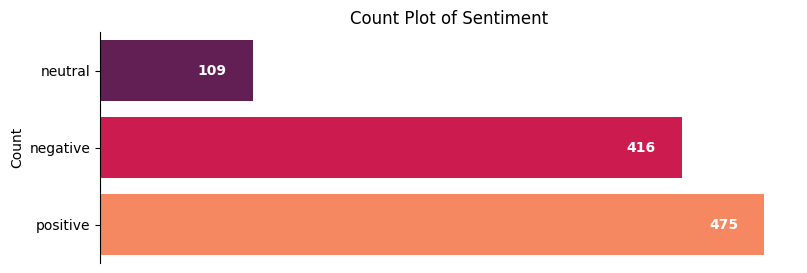

In [33]:
plt.figure(figsize=(9,3))

axes=sns.countplot(data=df,y='Sentiment',width=0.8,saturation=1,palette='rocket')
plt.title('Count Plot of Sentiment')
plt.ylabel('Count')

axes.bar_label(axes.containers[0],color='white',padding=-40,fontweight='bold')                    # Setting the barlables, so that the count can be seen on the bars
axes.spines[['right','top','bottom']].set_visible(False)                                          # Removing the chart junk like boarders
axes.xaxis.set_visible(False)                                                                     # Sets visibility of x-axis to False so that x-axis doesn't visible

<Axes: xlabel='Trip Verification', ylabel='count'>

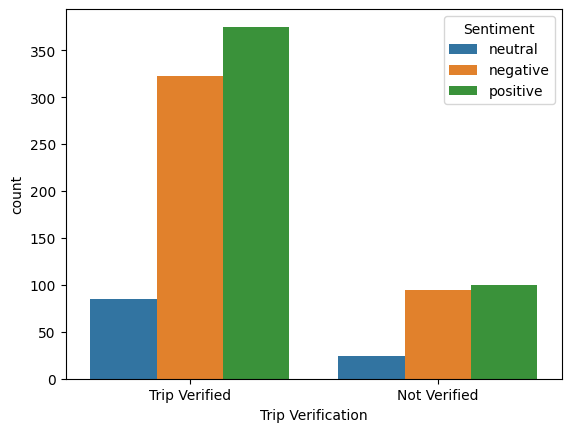

In [47]:
sns.countplot(data=df,x='Trip Verification',hue='Sentiment')

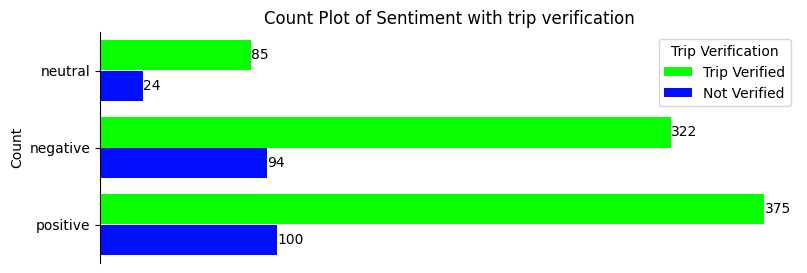

In [49]:
plt.figure(figsize=(9,3))

fig=sns.countplot(data=df,y='Sentiment',width=0.8,saturation=1,palette='hsv',hue='Trip Verification')
plt.title('Count Plot of Sentiment with trip verification')
plt.ylabel('Count')

# fig.bar_label(fig.containers[0],color='white',padding=-40,fontweight='bold')                    # Setting the barlables, so that the count can be seen on the bars
for label in fig.containers:                                                                                # setting barlabels
  fig.bar_label(label)
fig.spines[['right','top','bottom']].set_visible(False)                                          # Removing the chart junk like boarders
fig.xaxis.set_visible(False)                                                                     # Sets visibility of x-axis to False so that x-axis doesn't visible